In [109]:
#read and transform dataset
df = pd.read_csv('data/SF_data_private_3.csv',delimiter=',',index_col=0);
df = transformDataFrame(df)
df = df[df.price<300]
#df.plot(kind='scatter',x='lon',y='lat',c=df['price']/25);

In [110]:
#Number of training samples
M_train = int(len(df.index)*0.75)

#Randomly sample training set.
train_rows = np.random.choice(df.index.values,M_train)
df_train = df.ix[train_rows]
df_test = df.drop(train_rows)

print('M_total = %i, M_train = %i, M_test = %i' % (len(df.index),M_train,len(df.index)-M_train))
featureList = sorted(list(df.drop(['price','pred_price'],1,errors='ignore')))
pprint.pprint(featureList)

M_total = 4354, M_train = 3265, M_test = 1089
['acc_rating',
 'amen_1',
 'amen_10',
 'amen_11',
 'amen_12',
 'amen_13',
 'amen_14',
 'amen_15',
 'amen_16',
 'amen_17',
 'amen_18',
 'amen_19',
 'amen_2',
 'amen_20',
 'amen_21',
 'amen_22',
 'amen_23',
 'amen_24',
 'amen_25',
 'amen_26',
 'amen_27',
 'amen_28',
 'amen_29',
 'amen_3',
 'amen_30',
 'amen_31',
 'amen_32',
 'amen_33',
 'amen_34',
 'amen_35',
 'amen_36',
 'amen_37',
 'amen_38',
 'amen_39',
 'amen_4',
 'amen_40',
 'amen_41',
 'amen_42',
 'amen_43',
 'amen_44',
 'amen_45',
 'amen_46',
 'amen_47',
 'amen_48',
 'amen_49',
 'amen_5',
 'amen_50',
 'amen_6',
 'amen_7',
 'amen_8',
 'amen_9',
 'cancel_policy',
 'checkin_rating',
 'cleanliness_rating',
 'communication_rating',
 'dist_ferry',
 'guest_sat',
 'host_other_rev_count',
 'instant_book',
 'is_apt',
 'is_condo',
 'is_house',
 'is_superhost',
 'is_townhouse',
 'lat',
 'loc_rating',
 'lon',
 'num_bathrooms',
 'num_bedrooms',
 'num_beds',
 'person_cap',
 'pic_count',
 'review_coun

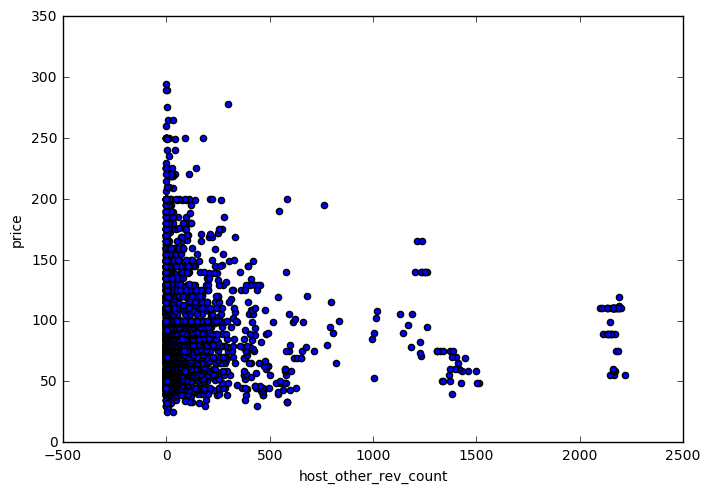

In [114]:
df.plot(x='host_other_rev_count',y='price',kind='scatter')


In [48]:
df.groupby('acc_rating').count()['price']

acc_rating
2.0        4
3.0        1
4.0       10
5.0        5
6.0       33
7.0       33
8.0      175
9.0      943
10.0    3150
Name: price, dtype: int64

In [75]:
#Biggest difference is if the accuracy rating is equal to 10 or not
for i in range(3,11):
    print (i,df[df.acc_rating<i].mean()['price'])
print(10,df[df.acc_rating==10].mean()['price'])

3 72.0
4 72.0
5 78.8666666667
6 80.55
7 80.358490566
8 84.0348837209
9 82.3601532567
10 84.3073089701
10 94.673968254


In [62]:
for i in range(3,6):
    print (i,df[df.cancel_policy==i].mean()['price'],df[df.cancel_policy==i].count()['price'])

3 90.9933818663 1511
4 91.7150094997 1579
5 92.8955696203 1264


In [71]:
df.groupby('checkin_rating').count()['price']

checkin_rating
2.0        3
4.0        5
5.0        2
6.0       19
7.0       18
8.0      104
9.0      593
10.0    3610
Name: price, dtype: int64

In [74]:
for i in range(2,11):
    print (i,df[df.checkin_rating<i].mean()['price'],df[df.checkin_rating<i].count()['price'])
print(10,df[df.checkin_rating==10].mean()['price'],df[df.checkin_rating==10].count()['price'])

2 nan 0
3 68.0 3
4 68.0 3
5 63.625 8
6 65.7 10
7 79.3448275862 29
8 72.7021276596 47
9 85.2649006623 151
10 82.8696236559 744
10 93.6493074792 3610


In [79]:
df.groupby('communication_rating').mean()['price']

communication_rating
2.0     84.666667
4.0     88.600000
5.0     71.666667
6.0     69.400000
7.0     78.136364
8.0     85.915254
9.0     82.498294
10.0    93.752572
Name: price, dtype: float64

In [80]:
df.groupby('communication_rating').count()['price']

communication_rating
2.0        3
4.0        5
5.0        3
6.0       20
7.0       22
8.0      118
9.0      586
10.0    3597
Name: price, dtype: int64

In [166]:
df['loc_6'] = df['loc_rating'].apply(lambda x:x>6)
df['loc_7'] = df['loc_rating'].apply(lambda x:x>7)
df['loc_8'] = df['loc_rating'].apply(lambda x:x>8)
df['loc_9'] = df['loc_rating'].apply(lambda x:x>9)

print(df[df.loc_6].mean()['price'] - df[df.loc_6==False].mean()['price'],
     df[df.loc_7].mean()['price'] - df[df.loc_7==False].mean()['price'],
     df[df.loc_8].mean()['price'] - df[df.loc_8==False].mean()['price'],
     df[df.loc_9].mean()['price'] - df[df.loc_9==False].mean()['price'])

print(df.groupby('loc_9').count()['price'])

17.0461875664 20.3033960692 16.8458006153 16.9897512975
loc_9
False    1659
True     2695
Name: price, dtype: int64


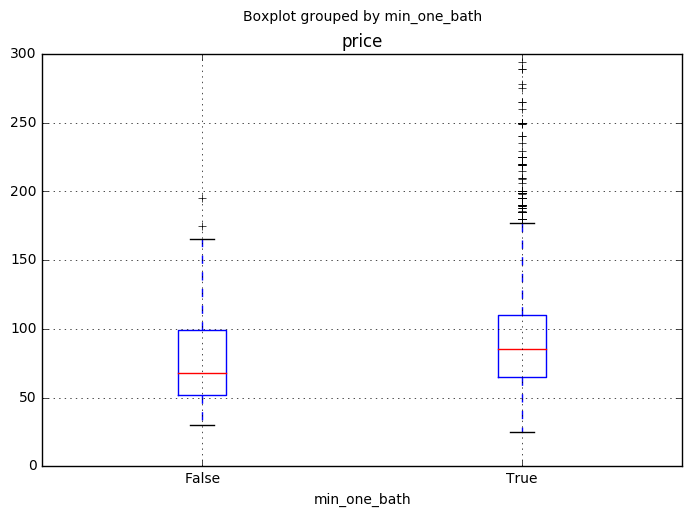

In [174]:
#print(df.groupby('num_bathrooms').count()['price'],
#      df.groupby('num_bathrooms').mean()['price'])
#df.boxplot(column='price',by='num_bathrooms')
df['min_one_bath'] = df['num_bathrooms'].apply(lambda x:x>=1)
df.boxplot(column='price',by='min_one_bath')

In [176]:
#only outliers have num_bedrooms !=1
print(df.groupby('num_bedrooms').count()['price'],
      df.groupby('num_bedrooms').mean()['price'])

num_bedrooms
0.0      12
1.0    4309
2.0      30
4.0       3
Name: price, dtype: int64 num_bedrooms
0.0    107.166667
1.0     91.649107
2.0    111.066667
4.0     65.000000
Name: price, dtype: float64


num_beds
1.0    3836
2.0     444
3.0      54
4.0      15
5.0       3
6.0       2
Name: price, dtype: int64 num_beds
1.0     90.147028
2.0    102.150901
3.0    107.111111
4.0    138.866667
5.0     91.000000
6.0    215.000000
Name: price, dtype: float64


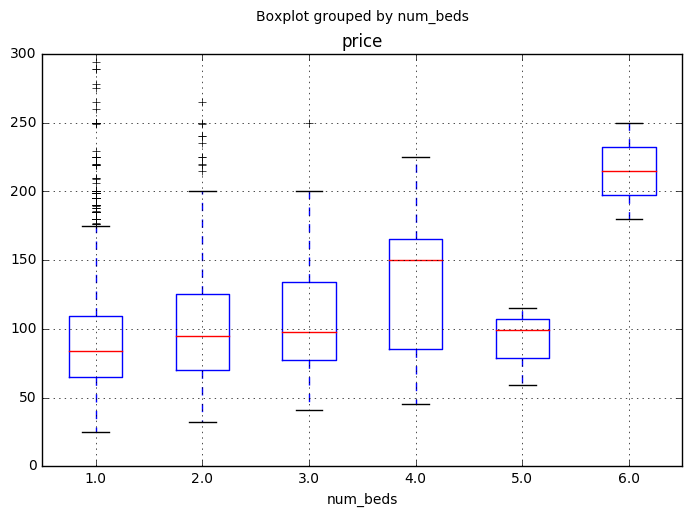

In [178]:
print(df.groupby('num_beds').count()['price'],
      df.groupby('num_beds').mean()['price'])
df.boxplot(column='price',by='num_beds')

person_cap
1.0      840
2.0     2981
3.0      258
4.0      215
5.0       32
6.0       21
7.0        2
8.0        3
9.0        1
10.0       1
Name: price, dtype: int64 person_cap
1.0      78.929762
2.0      92.793693
3.0      97.259690
4.0     115.804651
5.0     106.093750
6.0     105.333333
7.0     185.000000
8.0     137.333333
9.0     250.000000
10.0    180.000000
Name: price, dtype: float64


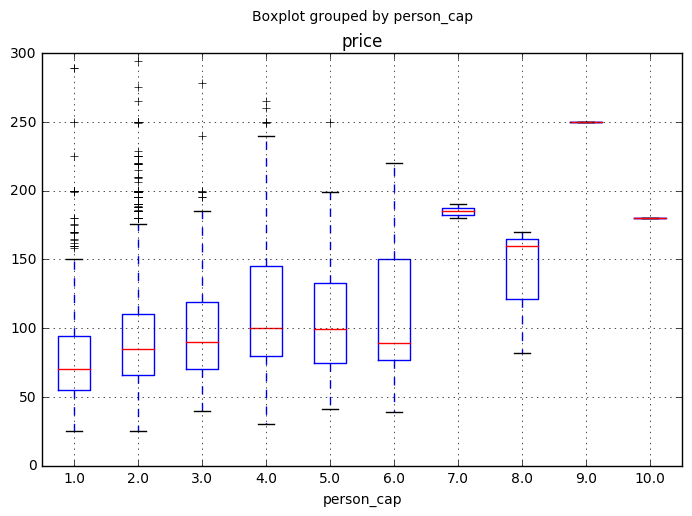

In [180]:
print(df.groupby('person_cap').count()['price'],
      df.groupby('person_cap').mean()['price'])
df.boxplot(column='price',by='person_cap')

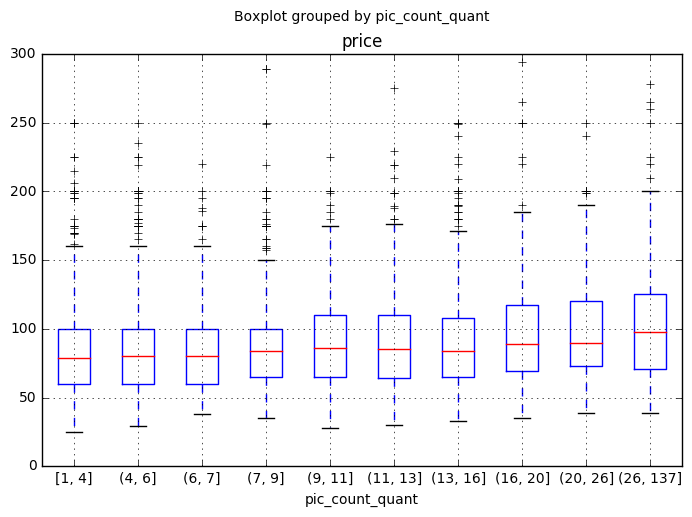

In [195]:
#print(df.groupby('pic_count').count()['price'],
#      df.groupby('pic_count').mean()['price'])
#df.boxplot(column='price',by='pic_count')
#df['pic_count_quant'] = pd.qcut(df['pic_count'],10)
#df.groupby('pic_count_quant').mean()['price']
#df.boxplot(column='price',by='pic_count_quant')
#df[df.pic_count>26]
#df.plot(x='pic_count',y='price',kind='scatter')
df.boxplot(column='price',by='pic_count_quant')

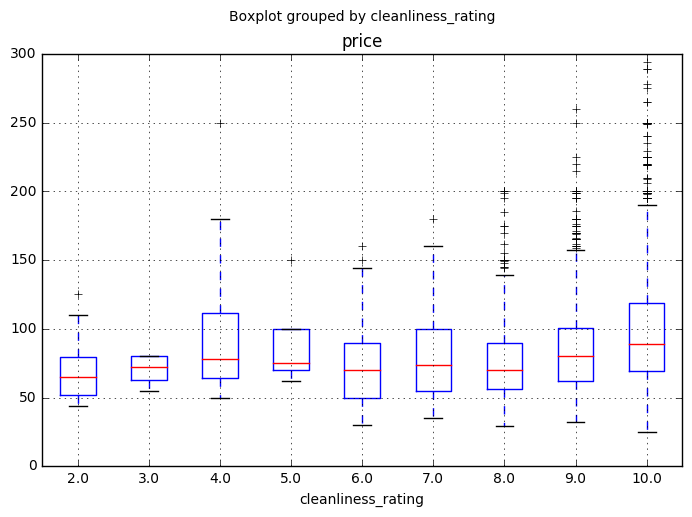

In [78]:
df.boxplot(column='price',by='cleanliness_rating')

review_count_quant
[1, 6]       94.334223
(6, 29]      87.421788
(29, 445]    93.558679
Name: price, dtype: float64

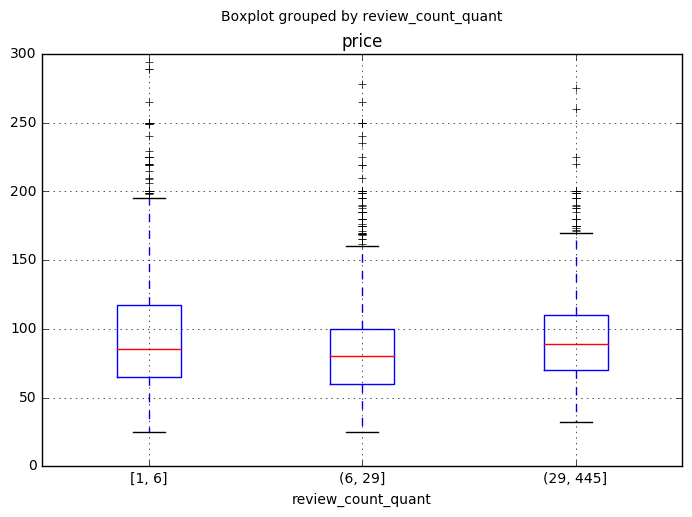

In [212]:
#print(df.groupby('review_count').count()['price'],
#     df.groupby('review_count').mean()['price'])
# df.boxplot(column='price',by='pic_count')
# df['pic_count_quant'] = pd.qcut(df['pic_count'],10)
# df.groupby('pic_count_quant').mean()['price']
# df.boxplot(column='price',by='pic_count_quant')
# df[df.pic_count>26]
#df.plot(x='review_count',y='price',kind='scatter')
df['review_count_quant'] = pd.qcut(df['review_count'],3)
df.boxplot(column='price',by='review_count_quant')
df.groupby('review_count_quant').mean()['price']

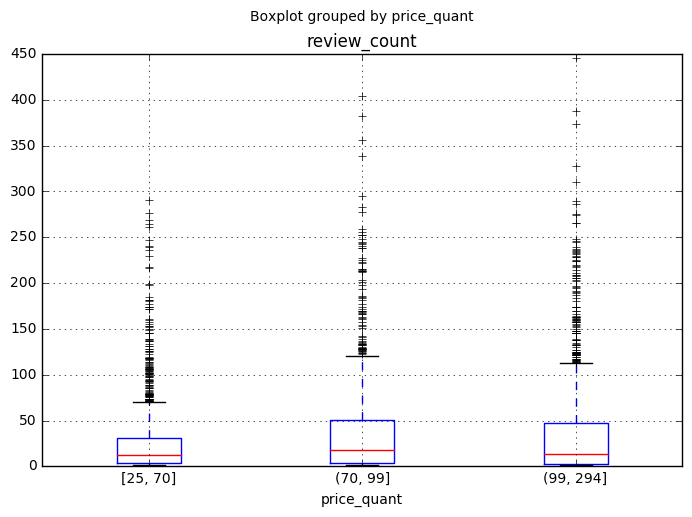

In [211]:
df['price_quant']=pd.qcut(df['price'],3)
df.boxplot(column='review_count',by='price_quant')

value_rating
2.0        7
4.0       15
5.0        7
6.0       28
7.0       56
8.0      285
9.0     1500
10.0    2456
Name: price, dtype: int64


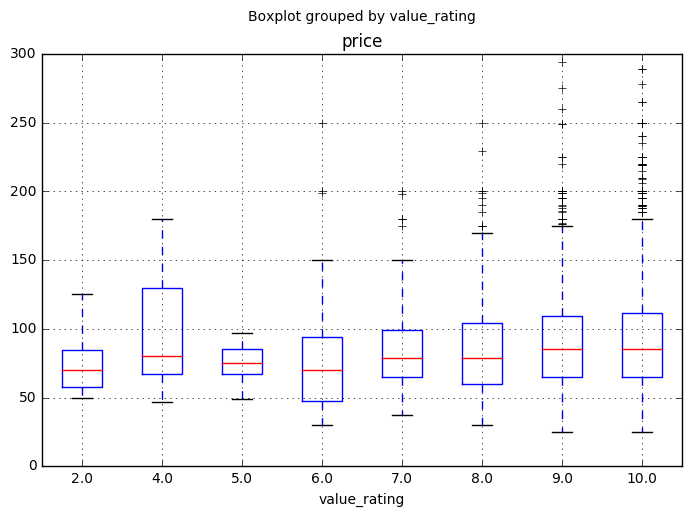

In [225]:
print(df.groupby('value_rating').count()['price'])
df.boxplot(column='price',by='value_rating')
df['value_rating_quant']=pd.qcut(df['value_rating'],1)

#df['review_count_quant'] = pd.qcut(df['review_count'],3)
#df.boxplot(column='price',by='review_count_quant')
#df.groupby('review_count_quant').mean()['price']

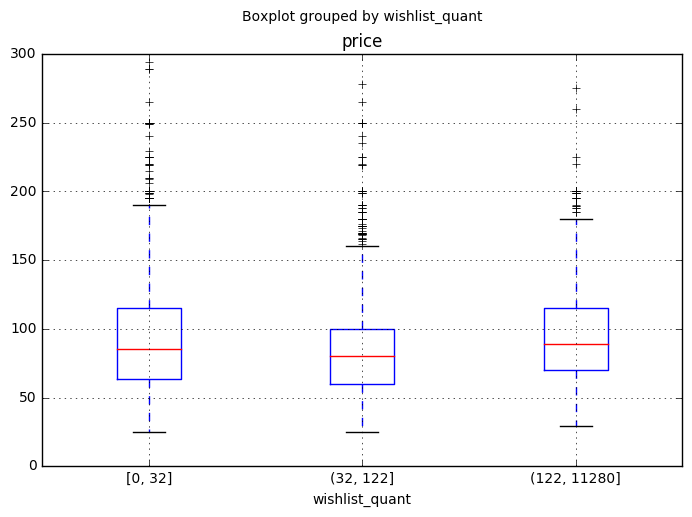

In [227]:
df['wishlist_quant']=pd.qcut(df['saved_to_wishlist_count'],3)
df.boxplot(column='price',by='wishlist_quant')

#df['review_count_quant'] = pd.qcut(df['review_count'],3)
#df.boxplot(column='price',by='review_count_quant')
#df.groupby('review_count_quant').mean()['price']

acc_rating
2.0     72.000000
3.0     72.000000
4.0     82.300000
5.0     85.600000
6.0     80.242424
7.0     89.939394
8.0     81.537143
9.0     84.846235
10.0    94.673968
Name: price, dtype: float64


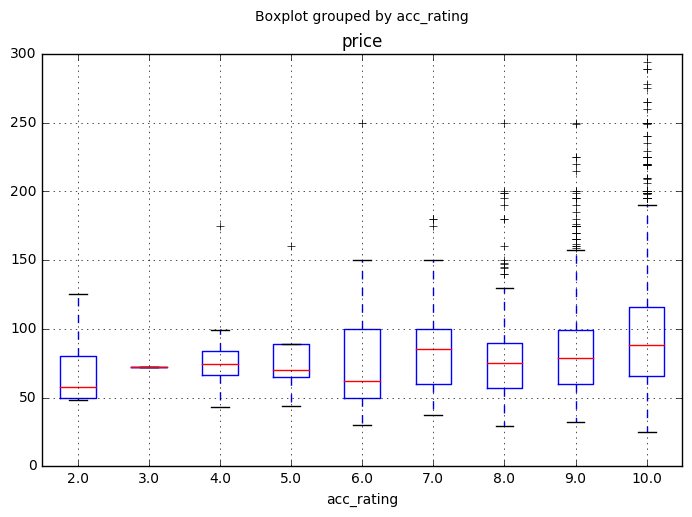

In [233]:
print(df.groupby('acc_rating').mean()['price'])
df.boxplot(column='price',by='acc_rating')

cancel_policy
3.0    90.993382
4.0    91.715009
5.0    92.895570
Name: price, dtype: float64


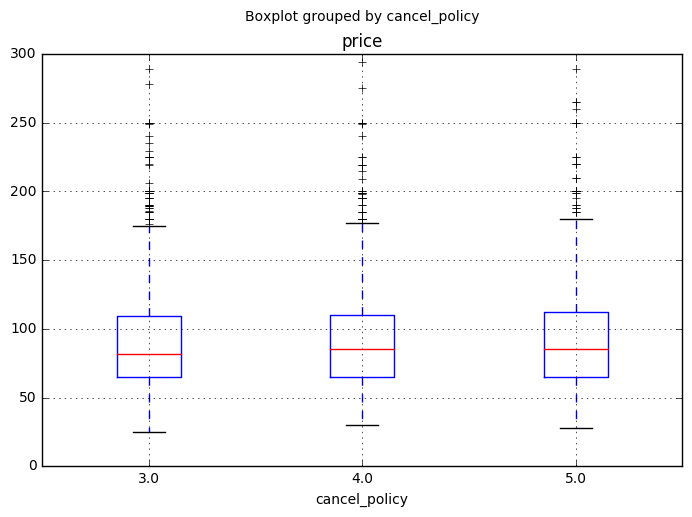

In [236]:
print(df.groupby('cancel_policy').mean()['price'])
df.boxplot(column='price',by='cancel_policy')

checkin_rating
2.0     68.000000
4.0     61.000000
5.0     74.000000
6.0     86.526316
7.0     62.000000
8.0     90.942308
9.0     82.259696
10.0    93.649307
Name: price, dtype: float64


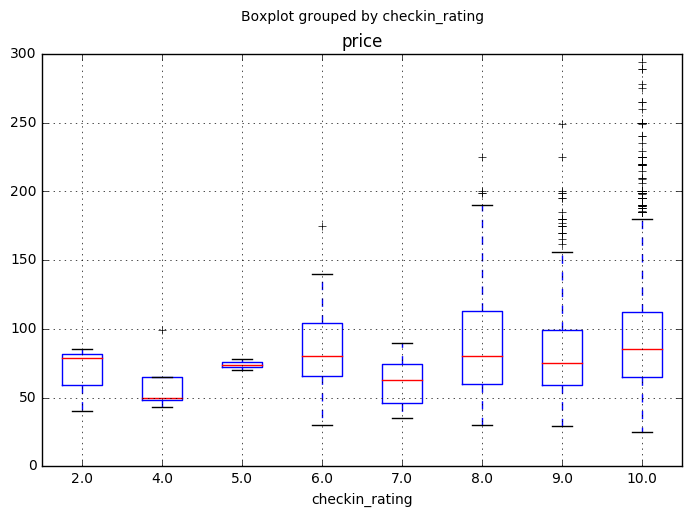

In [238]:
print(df.groupby('checkin_rating').mean()['price'])
df.boxplot(column='price',by='checkin_rating')

cleanliness_rating
2.0      71.545455
3.0      70.000000
4.0     101.416667
5.0      91.400000
6.0      74.627451
7.0      80.244681
8.0      78.022409
9.0      87.045998
10.0     96.291987
Name: price, dtype: float64


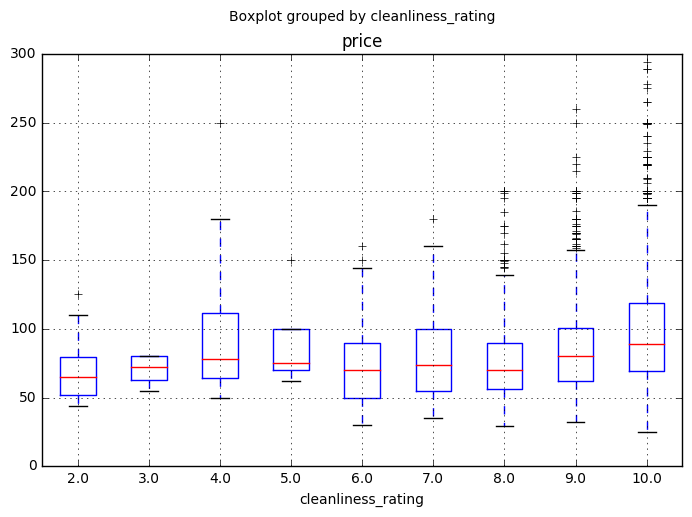

In [239]:
print(df.groupby('cleanliness_rating').mean()['price'])
df.boxplot(column='price',by='cleanliness_rating')

communication_rating
2.0     84.666667
4.0     88.600000
5.0     71.666667
6.0     69.400000
7.0     78.136364
8.0     85.915254
9.0     82.498294
10.0    93.752572
Name: price, dtype: float64


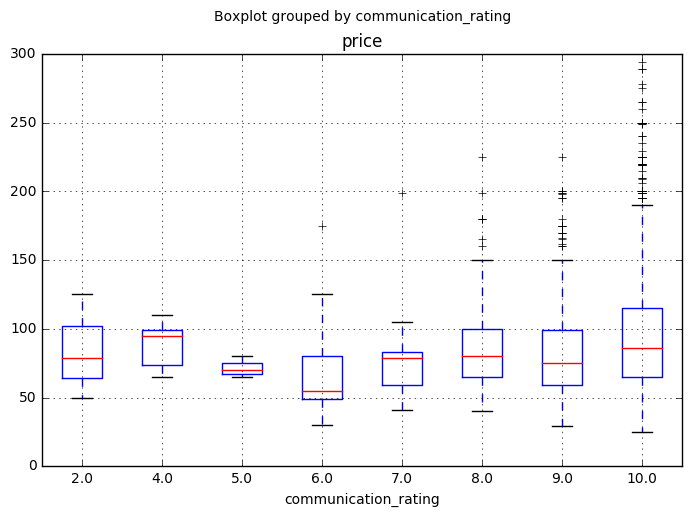

In [240]:
print(df.groupby('communication_rating').mean()['price'])
df.boxplot(column='price',by='communication_rating')

In [155]:
print(df.groupby('is_apt').mean()['price'],
      df.groupby('is_house').mean()['price'],
     df.groupby('is_townhouse').mean()['price'])

is_apt
False     87.550292
True     100.412908
Name: price, dtype: float64 is_house
False    101.038522
True      84.518701
Name: price, dtype: float64 is_townhouse
False    91.956929
True     84.012195
Name: price, dtype: float64


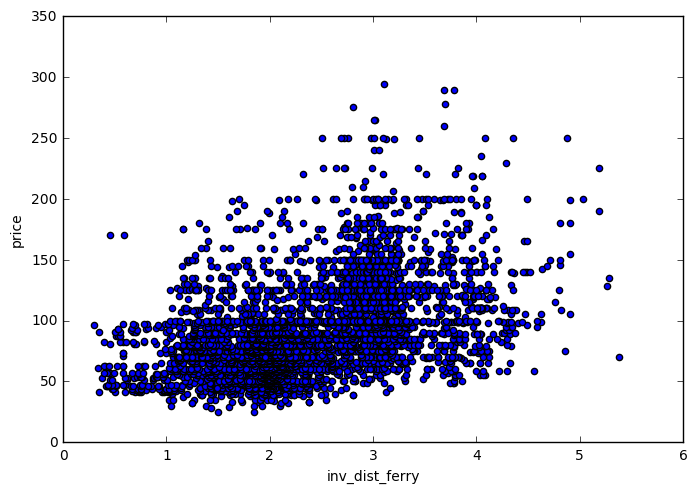

In [84]:
df['inv_dist_ferry']=df['dist_ferry'].apply(lambda x:math.log(1/x))
df.plot(x='inv_dist_ferry',y='price',kind='scatter')

In [107]:
#df['guest_sat_high']=pd.qcut(df['guest_sat'],2)
#df.groupby('guest_sat_high').mean()['price']
df['guest_sat_92']=df['guest_sat'].apply(lambda x:x>92)
df['guest_sat_93']=df['guest_sat'].apply(lambda x:x>93)
df['guest_sat_94']=df['guest_sat'].apply(lambda x:x>94)
df['guest_sat_95']=df['guest_sat'].apply(lambda x:x>95)
df['guest_sat_96']=df['guest_sat'].apply(lambda x:x>96)
df['guest_sat_97']=df['guest_sat'].apply(lambda x:x>97)
df['guest_sat_98']=df['guest_sat'].apply(lambda x:x>98)
df['guest_sat_99']=df['guest_sat'].apply(lambda x:x>99)

# print(
# df[df.guest_sat_92]['price'].mean() - df[df.guest_sat_95==False]['price'].mean(),
# df[df.guest_sat_93]['price'].mean() - df[df.guest_sat_95==False]['price'].mean(),
# df[df.guest_sat_94]['price'].mean() - df[df.guest_sat_95==False]['price'].mean(),
# df[df.guest_sat_95]['price'].mean() - df[df.guest_sat_95==False]['price'].mean(),
# df[df.guest_sat_96]['price'].mean() - df[df.guest_sat_96==False]['price'].mean(),
# df[df.guest_sat_97]['price'].mean() - df[df.guest_sat_97==False]['price'].mean(),
# df[df.guest_sat_98]['price'].mean() - df[df.guest_sat_98==False]['price'].mean(),
# df[df.guest_sat_99]['price'].mean() - df[df.guest_sat_99==False]['price'].mean())

df.groupby('guest_sat_95').count()['price']

guest_sat_95
False    1946
True     2408
Name: price, dtype: int64

In [147]:
df['host_cut']=df['host_other_rev_count'].apply(lambda x:x>0 and x<100)
#df['host_other_rev_count'][df.host_cut].hist()
#df.plot(x='host_other_rev_count',y='price',kind='scatter')
df['host_cut_0']=df['host_other_rev_count'].apply(lambda x: x>0)
df['host_cut_1']=df['host_other_rev_count'].apply(lambda x: x>1)
df['host_cut_2']=df['host_other_rev_count'].apply(lambda x: x>2)
df['host_cut_3']=df['host_other_rev_count'].apply(lambda x: x>3)
df['host_cut_4']=df['host_other_rev_count'].apply(lambda x: x>4)
df['host_cut_5']=df['host_other_rev_count'].apply(lambda x: x>5)
df['host_cut_6']=df['host_other_rev_count'].apply(lambda x: x>6)
#df.boxplot(column='price',by='host_cut')
print(df.groupby('host_cut_0').mean()['price'],
df.groupby('host_cut_1').mean()['price'],
df.groupby('host_cut_2').mean()['price'],
df.groupby('host_cut_3').mean()['price'],
df.groupby('host_cut_4').mean()['price'],
df.groupby('host_cut_5').mean()['price'],
df.groupby('host_cut_6').mean()['price'])


host_cut_0
False    95.605886
True     89.295689
Name: price, dtype: float64 host_cut_1
False    95.095796
True     89.310707
Name: price, dtype: float64 host_cut_2
False    94.869674
True     89.217465
Name: price, dtype: float64 host_cut_3
False    94.674832
True     89.179577
Name: price, dtype: float64 host_cut_4
False    95.112754
True     88.541096
Name: price, dtype: float64 host_cut_5
False    94.953749
True     88.512929
Name: price, dtype: float64 host_cut_6
False    94.844805
True     88.465027
Name: price, dtype: float64


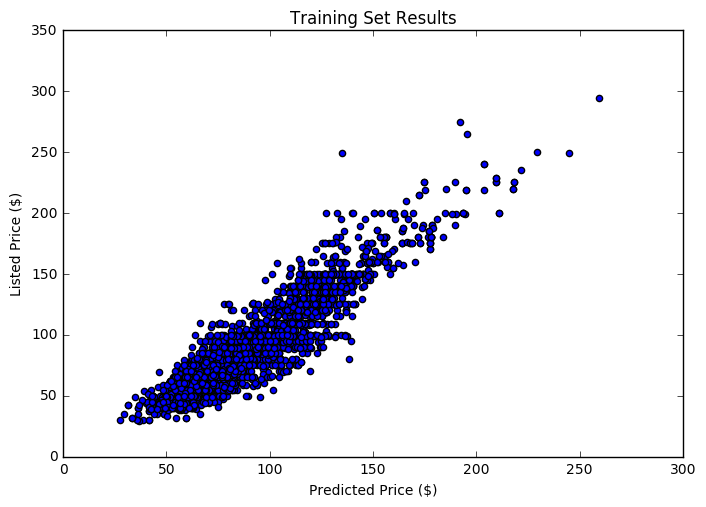

In [28]:
X = np.array(df_train[featureList])
Y = np.array(df_train['price'].astype('float'))
forest=GradientBoostingRegressor(loss='ls',n_estimators=500,max_depth=3)
#forest=RandomForestRegressor()#n_estimators=2000,max_features=10,n_jobs=20,max_depth=10,min_samples_leaf=5)
forest.fit(df_train[featureList],df_train['price'])
df['pred_price']=forest.predict(df[featureList])
plt.scatter(df.ix[train_rows]['pred_price'],df.ix[train_rows]['price'])
plt.title('Training Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

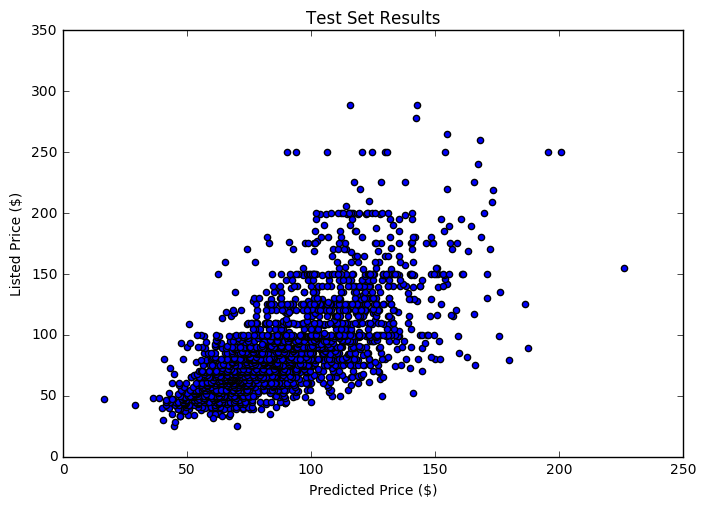

In [29]:
pred = forest.predict(df.drop(train_rows)[featureList])
plt.scatter(pred,df_test['price'])
plt.title('Test Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

In [12]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%i. %s (%f)" % (f+1,featureList[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
      color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [featureList[i] for i in indices],rotation=90)
#plt.xlim([-1, X.shape[1]])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'feature_importances_'

In [9]:
from sklearn.metrics import mean_squared_error

In [1]:
featureList_all = [featureList[i] for i in indices]
rms_dict = {'rms_train':[],'rms_test':[]}
for i in range(20):#len(featureList_all)):
    lst = featureList_all[0:i+1]
    X = np.array(df_train[lst])
    Y = np.array(df_train['price'].astype('float'))
    f=RandomForestRegressor(n_estimators=1000,n_jobs=-1,oob_score=True,min_samples_leaf=10)
    f.fit(df_train[lst],df_train['price'])
    df['pred_price']=f.predict(df[lst])
    rms_dict['rms_train'].append(mean_squared_error(df.ix[train_rows]['price'],df.ix[train_rows]['pred_price']))
    rms_dict['rms_test'].append(mean_squared_error(df.drop(train_rows)['price'],df.drop(train_rows)['pred_price']))
res_df = pd.DataFrame(rms_dict,index=range(1,len(rms_dict['rms_test'])+1))
res_df.plot()

NameError: name 'indices' is not defined

In [24]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [25]:
dbname = 'airbnb_db'
username = 'brian'
pswd = ''
engine = create_engine('postgresql://%s:%s@localhost/%s'%(username,pswd,dbname))
print('postgresql://%s:%s@localhost/%s'%(username,pswd,dbname))
print(engine.url)

postgresql://brian:@localhost/airbnb_db
postgresql://brian:@localhost/airbnb_db


In [26]:
df.to_sql('city_table', engine, if_exists='replace')

In [27]:
con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)
# query:
sql_query = 'SELECT * from city_table;'

airbnb_data_from_sql = pd.read_sql_query(sql_query,con,index_col='index')

In [28]:
from sklearn.externals import joblib

In [29]:
joblib.dump(forest,'static/forest_v1.pkl',compress=1)
joblib.dump(featureList,'static/featureList_v1.pkl',compress=1);

In [30]:
forest2 = joblib.load('static/forest_v1.pkl')

In [31]:
forest2.predict(airbnb_data_from_sql[featureList])

array([  36.21369525,   36.21369525,   36.21369525, ...,  121.1992944 ,
        131.88573052,  118.2836317 ])

In [32]:
df[['pred_price','price']]

,pred_price,price
5650515,36.213695,33.0
5650515,36.213695,33.0
5650515,36.213695,33.0
16536186,68.562460,38.0
4654218,89.520866,39.0
15026204,83.913010,32.0
11575586,81.658996,40.0
11620,82.745992,35.0
5976428,81.385772,39.0
15097577,67.750571,39.0
